# Importing Libraries

In [75]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import LabelEncoder

!pip install unidecode
!pip install openpyxl

import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
from time import time 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, Flatten, Conv1D, BatchNormalization
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K
import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from tensorflow.keras.layers import *
from tensorflow.keras.initializers import *
from tensorflow.keras import regularizers

#declare initial learning rate
initial_lr=0.001
epoch=100

In [76]:
df = pd.read_csv('/kaggle/input/bangla-fsa/Bangla financial sentiment.csv',encoding='UTF-8')
df  =df.drop(['Unnamed: 0.1',"Unnamed: 0"], axis=1)
df.head()

,Headline,label
0,তারল্যসংকট প্রতিদিনই জরিমানা দিচ্ছে শরিয়াহভিত্...,0
1,এবার বাংলাদেশের ঋণমান কমানোর কথা জানাল এসঅ্যান...,0
2,বৈশ্বিক মূল্যস্ফীতি কমবে প্রবৃদ্ধি কমে হবে ৩%,1
3,সংকটেও রেকর্ড মুনাফা লেনদেনে ফিরল শেয়ার,1
4,বিমার দাপট সপ্তাহজুড়ে কারসাজির সন্দেহ,0


# Data Preprocessing

1. Text to Word
2. Removing Punctuations and Special Characters

In [77]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations
                               
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)
    
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌�￰৷￰'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [78]:
df['Headline'] = df.Headline.apply(lambda x: preprocessing(str(x)))

In [79]:
df.reset_index(drop=True, inplace=True)


Now we will prepare the dataset to train in the proposed CNN network.So, we have to convert all Sentences into a numpy Array.

We have divided the training and testing data into 80/20 ratio.

We have converted the sentiment values into one hot encodings for the convenient use in model training.

In [80]:
training_sentences = []

train_sentences=df['Headline'].values
train_labels=df['label'].values
for i in range(train_sentences.shape[0]): 
    #print(train_sentences[i])
    x=str(train_sentences[i])
    training_sentences.append(x)
    
training_sentences=np.array(training_sentences)
train_labels=tf.keras.utils.to_categorical(train_labels)

print("training_sentences shape: "+str(training_sentences.shape))
print("train_labels shape: "+str(train_labels.shape))

training_sentences shape: (1836,)
train_labels shape: (1836, 2)


In [81]:
print(training_sentences[1])
print(train_labels[0])

এবার বাংলাদেশের ঋণমান কমানোর কথা জানাল এসঅ্যান্ডপি
[1. 0.]


In [82]:
vocab_size = len(training_sentences)+1
embedding_dim = 100
max_length = 100
trunc_type='post'
oov_tok = "<OOV>"

In [83]:
print(training_sentences.shape)
print(train_labels.shape)

(1836,)
(1836, 2)


At first, we will tokenize and then, we will be padding the sequences. We have used tokenizer only on training dataset to see how the model performs on unseen words.

In [84]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
print(len(word_index))
print("Word index length:"+str(len(tokenizer.word_index)))
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)



3623
Word index length:3623


In [85]:
print("Sentence :--> \n")
print(training_sentences[2]+"\n")
print("Sentence Tokenized and Converted into Sequence :--> \n")
print(str(sequences[2])+"\n")
print("After Padding the Sequence with padding length 100 :--> \n")
print(padded[2])

Sentence :--> 

বৈশ্বিক মূল্যস্ফীতি কমবে প্রবৃদ্ধি কমে হবে 

Sentence Tokenized and Converted into Sequence :--> 

[288, 57, 68, 49, 30, 18]

After Padding the Sequence with padding length 100 :--> 

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 288  57  68  49  30  18]


In [86]:
print("Padded shape(training): "+str(padded.shape))

Padded shape(training): (1836, 100)


# Model Creation

At first, we have created embeddings from the text.

In [87]:
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def f1_score(y_true, y_pred):
    pr = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    f1_score = 2 * (pr * rec) / (pr + rec)
    return f1_score

In [88]:
# padded
train_labels

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [89]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(padded, train_labels, test_size=0.2, shuffle= True) #data, label

In [90]:
from tensorflow.keras.callbacks import *

# fit network
checkpoint = ModelCheckpoint('BestModel.h5',
                             monitor='val_accuracy',
                             save_best_only=True,
                             verbose=1,
                             mode='auto',
                             save_weights_only=False,
                             period=1)
earlystop = EarlyStopping(monitor='val_accuracy',
                          min_delta=.0001,
                          patience=100,
                          verbose=1,
                          mode='auto',
                          baseline=None,
                          restore_best_weights=True)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            factor=np.sqrt(.1),
                                             patience=30,
                                             verbose=1,
                                             mode='auto',
                                             min_delta=.0001,
                                             cooldown=0,
                                             min_lr=0.0000001)

callbacks = [checkpoint,learning_rate_reduction,earlystop]

# model 12

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          183700    
                                                                 
 conv1d_12 (Conv1D)          (None, 98, 64)            19264     
                                                                 
 batch_normalization_17 (Bat  (None, 98, 64)           256       
 chNormalization)                                                
                                                                 
 activation_17 (Activation)  (None, 98, 64)            0         
                                                                 
 dropout_12 (Dropout)        (None, 98, 64)            0         
                                                                 
 conv1d_13 (Conv1D)          (None, 96, 96)            18528     
                                                      

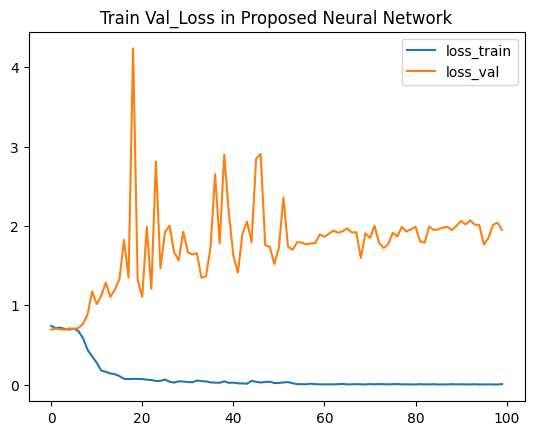

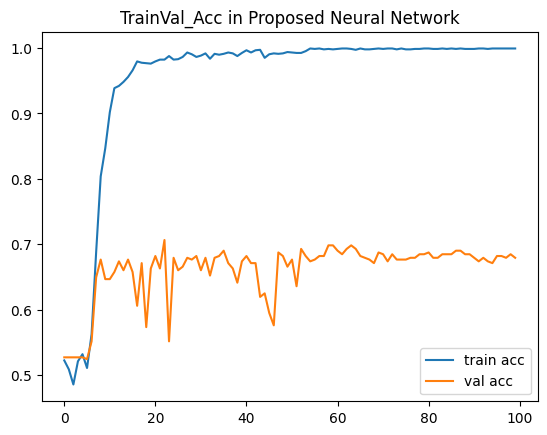

<Figure size 640x480 with 0 Axes>

In [91]:
# from tensorflow.keras.layers import GlobalMaxPooling1D

detection11=Sequential()

detection11.add(Embedding(vocab_size, embedding_dim, input_length=max_length))

#1 -convolutional layer-1
detection11.add(Conv1D(64 ,kernel_size=3))
detection11.add(BatchNormalization())
detection11.add(Activation('relu'))
detection11.add(Dropout(0.2))

#2 -convolutional layer-2
detection11.add(Conv1D(96,kernel_size=3))
detection11.add(BatchNormalization())
detection11.add(Activation('relu'))
detection11.add(Dropout(0.3))

#2 -convolutional layer-2
detection11.add(Conv1D(96,kernel_size=3))
detection11.add(BatchNormalization())
detection11.add(Activation('relu'))
detection11.add(Dropout(0.3))

#2 -convolutional layer-2
detection11.add(Conv1D(128,kernel_size=3))
detection11.add(BatchNormalization())
detection11.add(Activation('relu'))
detection11.add(Dropout(0.3))
#2 -convolutional layer-2
detection11.add(Conv1D(128,kernel_size=3))
detection11.add(BatchNormalization())
detection11.add(Activation('relu'))
detection11.add(Dropout(0.3))
#2 -convolutional layer-2
detection11.add(Conv1D(128,kernel_size=3))
detection11.add(BatchNormalization())
detection11.add(Activation('relu'))
detection11.add(Dropout(0.3))

detection11.add(Flatten())
detection11.add(Dense(128))
detection11.add(BatchNormalization())
detection11.add(Activation('relu'))

detection11.add(Flatten())
detection11.add(Dense(96))
detection11.add(BatchNormalization())
detection11.add(Activation('relu'))

detection11.add(Flatten())
detection11.add(Dense(64))
detection11.add(BatchNormalization())
detection11.add(Activation('relu'))

detection11.add(Dense(2,activation='sigmoid'))
optimum=Adam(lr=initial_lr)
detection11.summary()
detection11.compile(optimizer=optimum,loss='categorical_crossentropy',metrics=['accuracy', precision, recall])


model11_history = detection11.fit(x_train, y_train,shuffle=True,epochs=epoch,
                              batch_size=16,validation_data=(x_valid,y_valid),
                              callbacks = callbacks)


print("loss: - accuracy: - recall:  - precision")
print("Result on Train Dataset:")
print(detection11.evaluate(x=x_train,y=y_train,verbose=1))
print("Result on Validation Dataset:")
print(detection11.evaluate(x= x_valid,y=y_valid,verbose=1))


plt.plot(model11_history.history['loss'], label='loss_train')
plt.plot(model11_history.history['val_loss'], label='loss_val')
# plt.plot(mod.history['accuracy'], label='acc_train')
# plt.plot(mod.history['val_accuracy'], label='acc_val')
plt.legend()
plt.title('Train Val_Loss in Proposed Neural Network')
plt.show()
plt.savefig('LossVal_Loss')
plt.plot(model11_history.history['accuracy'], label='train acc')
plt.plot(model11_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('TrainVal_Acc in Proposed Neural Network')
plt.show()
plt.savefig('AccVal_Acc')

In [93]:
y_pred=detection11.predict(x_valid)
print(f1_score(y_valid,y_pred))

12/12 [==============================] - 0s 3ms/step
tf.Tensor(0.6776406, shape=(), dtype=float32)


In [94]:
!pip install git+https://github.com/paulgavrikov/visualkeras --upgrade

  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-4bn0whej
  Running command git clone --filter=blob:none --quiet https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-4bn0whej
  Resolved https://github.com/paulgavrikov/visualkeras to commit cd169b81be347e2090353ad6fe2bd2e1f4020cf4
  Preparing metadata (setup.py) ... done


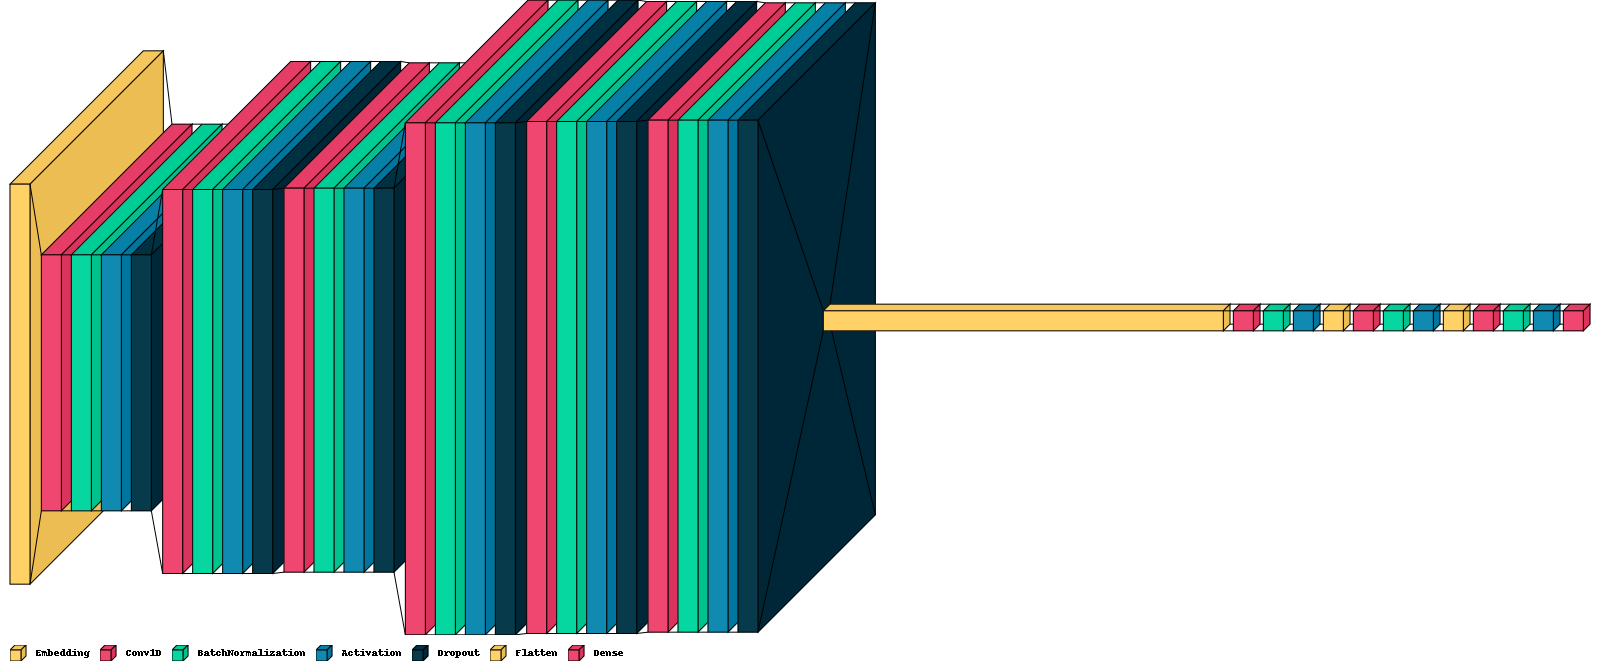

In [95]:
import visualkeras
visualkeras.layered_view(detection11, legend=True,to_file='output.png')

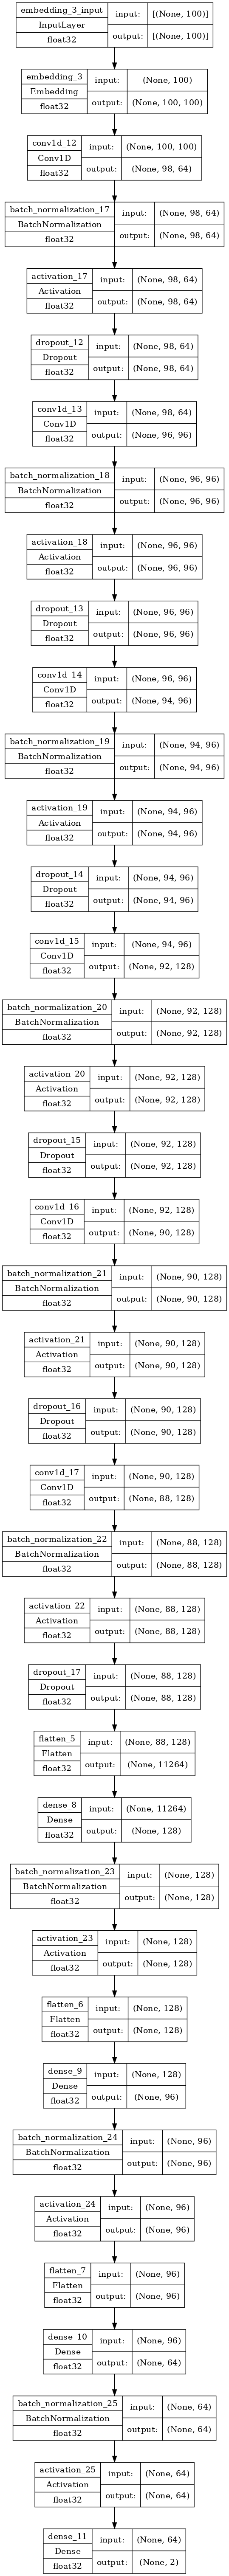

In [96]:
tf.keras.utils.plot_model(detection11, show_shapes = True, show_dtype = True, show_layer_names = True, rankdir="TB", expand_nested = True, dpi = 100)